#Random Forest in Predicting  Stock Price

##Analysis Outline

###Data Acquisition and Preprocessing:
First, we introduce the data generation process for each type of analysis and visualize the generated data.

###Analysis and Results:
Subsequently, we do the pertinent analysis for each situation, accompanied by suitable visualizations to elucidate the results.

###Comparison with the True Data Generating Process:

Ultimately, we evaluate the analytical outcomes against the actual data generation process to determine the precision and insights of each employed model or procedure.


---

#1. Natural Language Process
## Setup and Data Loading
In this step, we install necessary packages, import libraries, and load the dataset from an online source. The database contains historical stock trading data for Apple Inc. (AAPL). We have grabbed the data from another paper called Create custom gym environments from scratch — A stock market example published in Medium.

## Data Cleaning and Preprocessing
In this step, we clean the data of AAPL by removing unnecessary columns like the first and the second columns. Then we converte the date formats into the form that the Random Forest model can understand. So we ensure that date columns are in the correct datetime format for accurate chronological analysis, which is crucial for time-series data.


In [3]:
#Setup
pip install pandas

In [6]:
#Show the database contains historical stock trading data for Apple Inc (AAPL) from 1998 to 2018.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/notadamking/Stock-Trading-Environment/refs/heads/master/data/AAPL.csv')
df


,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,1998-01-02,13.63,16.2500,13.5000,16.25,6411700.0
1,1,1998-01-05,16.50,16.5600,15.1900,15.88,5820300.0
2,2,1998-01-06,15.94,20.0000,14.7500,18.94,16182800.0
3,3,1998-01-07,18.81,19.0000,17.3100,17.50,9300200.0
4,4,1998-01-08,17.44,18.6200,16.9400,18.19,6910900.0
...,...,...,...,...,...,...,...
5250,5250,2018-11-12,199.00,199.8500,193.7900,194.17,51135518.0
5251,5251,2018-11-13,191.63,197.1800,191.4501,192.23,46882936.0
5252,5252,2018-11-14,193.90,194.4800,185.9300,186.80,60800957.0
5253,5253,2018-11-15,188.39,191.9700,186.9000,191.41,46478801.0


In [7]:
# Read the stock data from a CSV file located online
url = 'https://raw.githubusercontent.com/notadamking/Stock-Trading-Environment/refs/heads/master/data/AAPL.csv'
data = pd.read_csv(url)

# Check column names to understand the data structure
print(data.columns)

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [8]:
# Read the stock data from a CSV file located online
url = 'https://raw.githubusercontent.com/notadamking/Stock-Trading-Environment/refs/heads/master/data/AAPL.csv'
data = pd.read_csv(url)

# Remove unnecessary column from the DataFrame
data.drop(columns=['Unnamed: 0'], inplace=True)

# Convert the 'Date' column to datetime format for accurate date handling
data['Date'] = pd.to_datetime(data['Date'])



---
#2. Feature Engineering
**In this step, we create lagged features to capture historical patterns in the data, and prepare the dataset for modeling.**
##Create Lagged Features
This involves creating new features by shifting existing features to provide temporal context to the model.
##Concatenate and Clean Data
Concatenate all lagged features into a single DataFrame. Ensure the dataset does not include null values from shifted rows, which represent days with not enough preceding data to create lagged features.



In [9]:
# Prepare to store lagged features for modeling time series data
lagged_features = []

# Create lagged features by shifting the stock data by various lags (1 to 50 days)
for i in range(1, 51):
    lagged_feature = data[['Open', 'High', 'Low', 'Volume', 'Close']].shift(i)
    lagged_feature.columns = [f'{col}_lag{i}' for col in lagged_feature.columns]
    lagged_features.append(lagged_feature)

# Concatenate all lagged features into a single DataFrame
lagged_data = pd.concat(lagged_features, axis=1)

# Add the target variable (the 'Close' price) to the DataFrame
lagged_data['Close'] = data['Close']

# Drop rows with NaN values generated due to insufficient lagged feature data
lagged_data.dropna(inplace=True)




---


#3. Model Training
##Split Data into Training and Testing Sets
We divide the dataset into separate subsets for training and testing, generally using an 80-20 split to provide the model with adequate data for learning while retaining a testing subset for evaluation. The model predicts the final value on a given day based on data from the preceding 50 days, including open value, close value, high value, low value, and trade volume.
##Train the Model
We utilize a Random Forest regressor to fit the training data. Random forests are chosen for their robustness and ability to handle high-dimensional data efficiently.


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Use the lagged features as the input set (X) and 'Close' as the target variable (y)
X = lagged_data.drop(columns=['Close'])
y = lagged_data['Close']

# Split the dataset into training and testing sets (80% training, 20% testing)
train_size = int(len(lagged_data) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
dates_test = data['Date'].iloc[train_size+50:]  # Adjust test dates due to lag

# Train a Random Forest model on the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)



---


#4. Model Evaluation and Visualization

##Evaluate the Model
Use metrics like Mean Squared Error (MSE) to quantitatively assess the accuracy of the model’s predictions against the actual stock prices in the test data.
##Visualize Results
Plot actual versus predicted stock prices using Matplotlib for a visual comparison. This helps identify trends, patterns, or discrepancies in predictions at a glance, offering insights for potential model improvements.



Mean Squared Error: 12.389219721128645


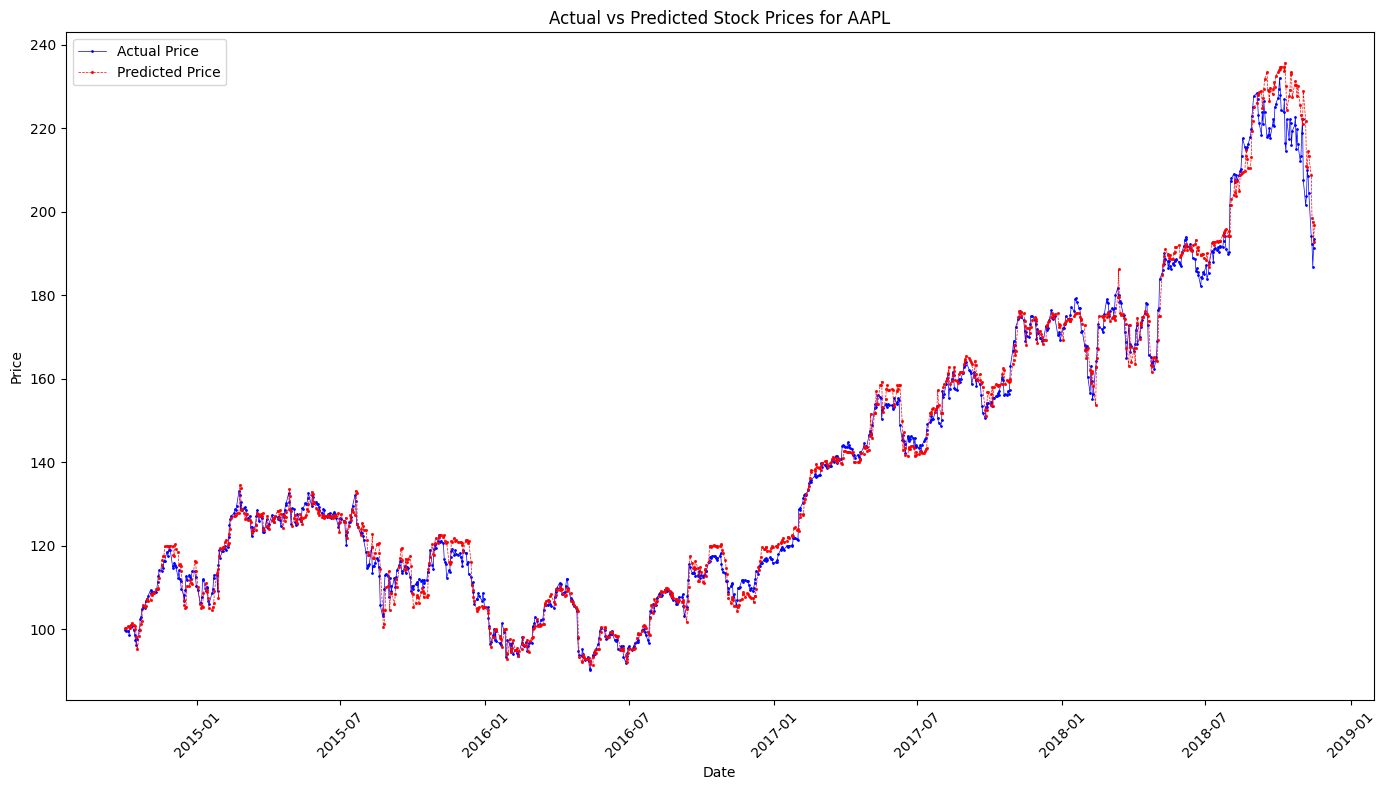

In [11]:
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict(X_test)

# Compute the mean squared error of the model predictions
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the results: actual vs predicted stock prices
plt.figure(figsize=(14, 8))

# Plot actual stock prices
plt.plot(dates_test, y_test, label='Actual Price', color='blue', marker='o', markersize=1, linewidth=0.5)

# Plot predicted stock prices by the model
plt.plot(dates_test, predictions, label='Predicted Price', color='red', linestyle='--', marker='s', markersize=1, linewidth=0.5)

plt.title('Actual vs Predicted Stock Prices for AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
